In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sktime

Импортируем данные

In [3]:
raw_data_folder = "../data/raw/"

In [9]:
air_reserve = pd.read_csv(
    raw_data_folder + "air_reserve.csv", index_col="visit_datetime", parse_dates=True
)

# hpg_reserve = pd.read_csv('C:/Users/Jessy/Desktop/study/ml/jupyter/homework/data/hpg_reserve.csv', index_col = 'visit_datetime', parse_dates = True)
# air_store_info = pd.read_csv('C:/Users/Jessy/Desktop/study/ml/jupyter/homework/data/air_store_info.csv')
# hpg_store_info = pd.read_csv('C:/Users/Jessy/Desktop/study/ml/jupyter/homework/data/hpg_store_info.csv')
# store_id_relation = pd.read_csv('C:/Users/Jessy/Desktop/study/ml/jupyter/homework/data/store_id_relation.csv')
# air_visit_data = pd.read_csv('C:/Users/Jessy/Desktop/study/ml/jupyter/homework/data/air_visit_data.csv', index_col = 'visit_date', parse_dates = True)
# date_info = pd.read_csv('C:/Users/Jessy/Desktop/study/ml/jupyter/homework/data/date_info.csv', index_col = 'calendar_date', parse_dates = True)

In [17]:
air_reserve.columns

Index(['air_store_id', 'reserve_datetime', 'reserve_visitors'], dtype='object')

In [22]:
air_reserve.groupby('air_store_id').sum()

,reserve_datetime,reserve_visitors
air_store_id,,
air_00a91d42b08b08d9,2016-10-31 16:00:002016-12-01 15:00:002016-12-...,70
air_0164b9927d20bcc3,2016-10-21 17:00:002016-10-25 20:00:002016-10-...,517
air_034a3d5b40d5b1b1,2016-10-26 22:00:002016-10-28 19:00:002016-11-...,93
air_03963426c9312048,2016-01-06 14:00:002016-01-06 14:00:002016-01-...,8200
air_04341b588bde96cd,2016-10-29 23:00:002016-10-29 23:00:002016-10-...,208
...,...,...
air_fcfbdcf7b1f82c6e,2016-11-18 20:00:002016-10-06 17:00:002016-12-...,333
air_fdc02ec4a3d21ea4,2016-10-17 23:00:002016-11-25 19:00:002016-11-...,166
air_fe22ef5a9cbef123,2016-01-02 19:00:002016-01-05 23:00:002016-01-...,1393


(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='reserve_visitors'>)

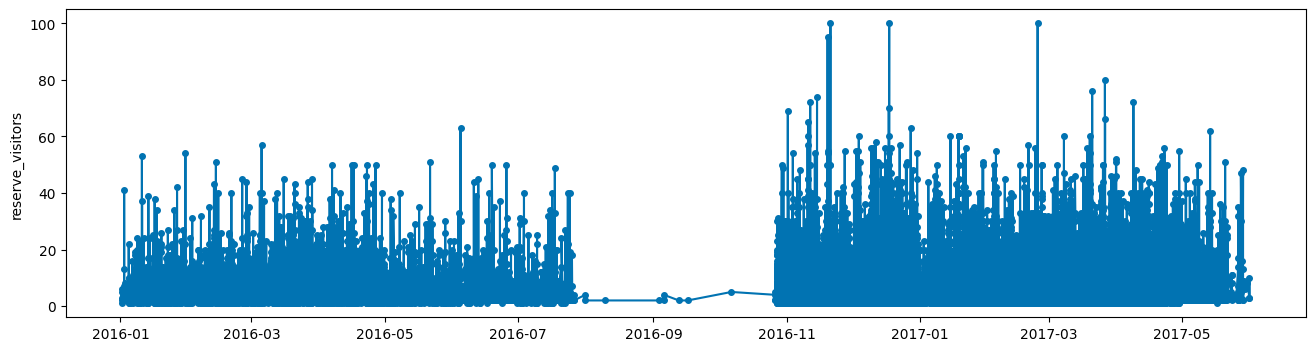

In [18]:
sktime.utils.plot_series(air_reserve['reserve_visitors'])

In [ ]:
air_reserve.head()

Проверка на пропущенные значения


In [ ]:
print(air_reserve.isnull().sum())
print(hpg_reserve.isnull().sum())
print(air_store_info.isnull().sum())
print(hpg_store_info.isnull().sum())
print(store_id_relation.isnull().sum())
print(air_visit_data.isnull().sum())
print(date_info.isnull().sum())

In [ ]:
air_reserve.isnull().sum()

In [ ]:
df = air_reserve.merge(
    air_store_info, on="air_store_id", how="inner", validate="many_to_one"
)

In [ ]:
df.index = df["reserve_datetime"]

In [ ]:
df.index = pd.to_datetime(df.index)

In [ ]:
df

In [ ]:
air_store_info

In [ ]:
air_reserve

In [23]:
daily_visit = (
    air_reserve.groupby(air_reserve["visit_datetime"].dt.date)["reserve_visitors"]
    .sum()
    .reset_index()
)
daily_visit.columns = ["visit_datetime_day", "sum_visitors"]

KeyError: 'visit_datetime'

In [ ]:
ax = air_reserve.plot(
    xlabel="visit_datetime", ylabel="reserve_visitors", figsize=(12, 6)
)
ax.set(xlabel="visit_day", ylabel="visitors")

In [ ]:
air_reserve.head()

In [ ]:
date_info.index = pd.to_datetime(date_info.index)

In [ ]:
date_info.plot()

In [ ]:
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.model_selection import backtesting_forecaster
from skforecast.model_selection import grid_search_forecaster

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
)  # Загрузка и обработка данных
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler